# Assignment1 

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [ ]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [ ]:
data.head(11)

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2
5,9,37.4,53.6,-5,1037,58.8
6,9,35.1,71.4,3,986,58.6
7,6,38.8,58.3,6,819,59.2
8,5,36.6,52.6,-19,791,54.4


In [ ]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [ ]:
X = data.drop(["y"], axis=1,inplace=False)
y=data["y"]

In [ ]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X
X.shape

(9, 5)

In [ ]:
y
y.shape

(9,)

### 1. Normal Equation

In [ ]:
import numpy as np
from numpy.linalg import inv 

In [ ]:
def estimate_beta(X, y):
    
    designX = np.c_[np.ones((9,1)),X]
    beta_hat = inv(designX.T.dot(designX)).dot(designX.T).dot(y)
    
    return beta_hat

In [ ]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)

pred = model.predict(X)

In [ ]:
print("Intercept: ",model.intercept_) # intercept
print("Coeffiecient: ",model.coef_) # 추정된 회귀계수 (intercept제외)

from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error (MSE): %.2f"%(mean_squared_error(y,pred)))
print("Coefficient of determinant (R^2): %.2f"%(r2_score(y,pred)))

Intercept:  -39.24473678135655
Coeffiecient:  [ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]
Mean Squared Error (MSE): 1.62
Coefficient of determinant (R^2): 0.71


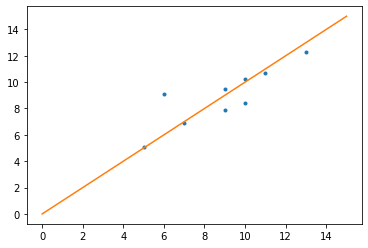

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

# 예측 vs 실제 데이터 plot
plt.plot(y, model.predict(X), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 15,15)
y = x
plt.plot(x, y)
plt.show()

### 2. MSE

In [ ]:
def MSE(X, y, beta_hat):
    designX = np.c_[np.ones((9,1)),X]
    y_pred = designX.dot(beta_hat)
    mse = np.square(np.subtract(y,y_pred)).mean()
    
    return mse

In [ ]:
MSE(X, y, estimate_beta(X, y))

1.6155977229019227

### 3.MLE

#### 바구니 안에 파란구슬과 빨간구슬이 들어있을 때, 10개를 추출하여보니 파란구슬이 2개 빨간구슬이 8개가 추출되었습니다. 
#### 이때 바구니안에는 파란구슬과 빨간구슬이 각각 몇개있는지에 대해서 최대우도추정법을 이용해 논리적으로 설명해주세요. 
- 수식은 있어도 좋고 말로 풀어쓰셔도 좋습니다
- 추출은 복원추출을 전제로 합니다
- 글자수 제한은 없습니다. 많이 쓰라는 얘기가 아니라 정말 제한이 없습니다. 너무 부담가지고 쓰지마세요.

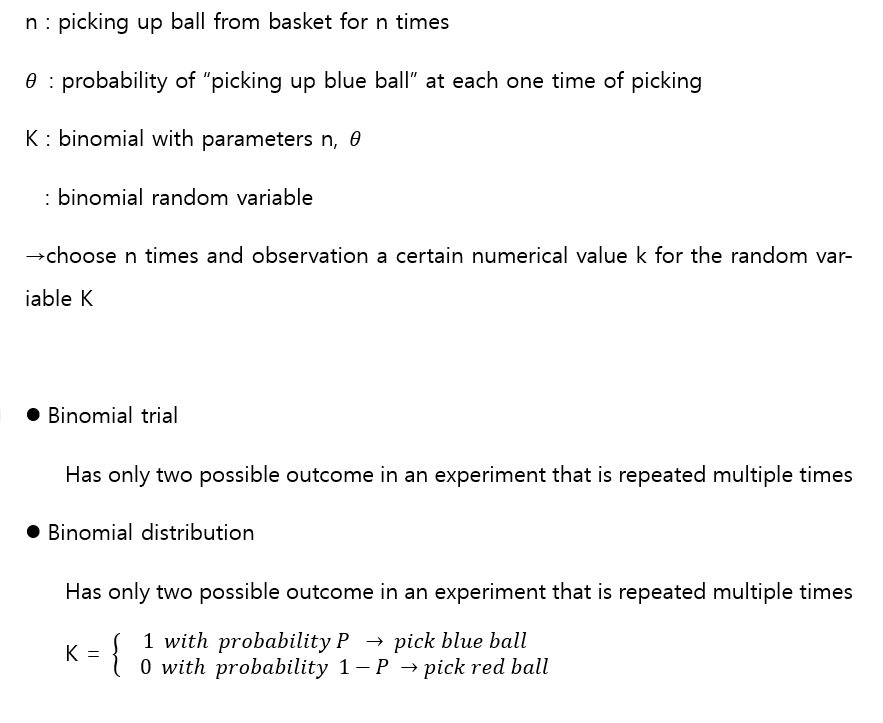

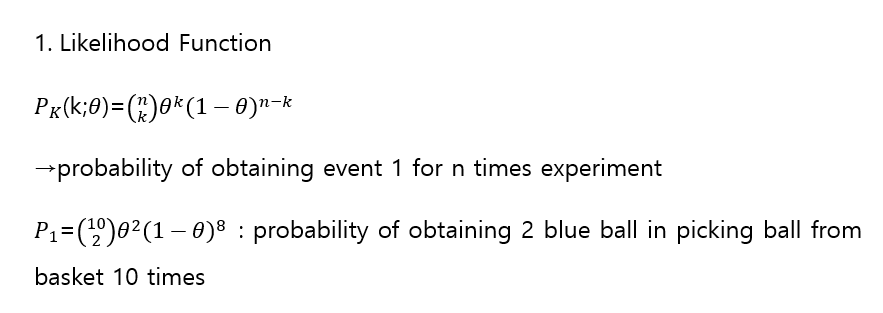

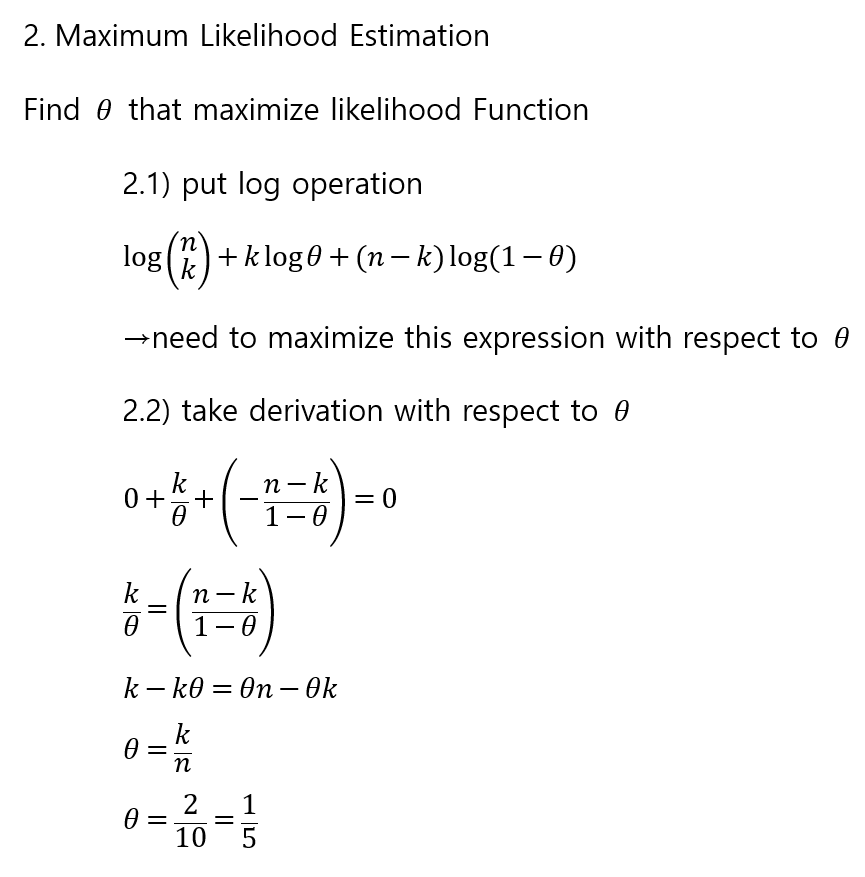

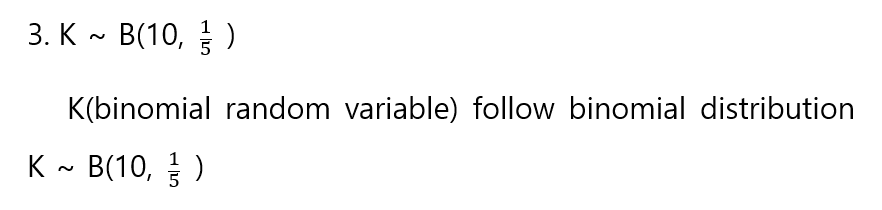

In [ ]:
from scipy.stats import binom
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt

In [23]:
n = 10
p = 0.2
# defining the list of r values 
r_values = list(range(n + 1)) 
# obtaining the mean and variance  
mean, var = binom.stats(n, p) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# printing the table 
print("r\tp(r)") 
for i in range(n + 1): 
    print(str(r_values[i]) + "\t" + str(dist[i])) 
# printing mean and variance 
print("mean : ",mean) 
print("variance : ",var)

r	p(r)
0	0.1073741824
1	0.2684354560000003
2	0.301989888
3	0.20132659200000022
4	0.08808038400000008
5	0.02642411520000004
6	0.00550502400000001
7	0.0007864320000000006
8	7.372800000000005e-05
9	4.096000000000007e-06
10	1.0240000000000004e-07
mean :  2.0
variance :  1.6


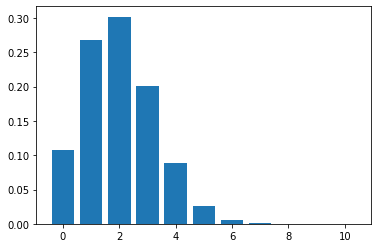

In [24]:
plt.bar(r_values, dist) 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

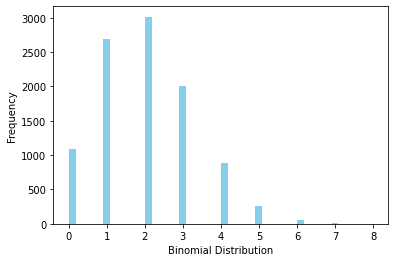

In [22]:
data_binom = binom.rvs(n=10,p=0.2,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')